🌺 Mẫu [[3.  2.4]] được dự đoán là: versicolor


D:\WindowsTemp\ipykernel_22560\1576324786.py:49: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=plt.cm.Set1(norm(label)), label=iris.target_names[label], edgecolor='k', s=40)
d:\App\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


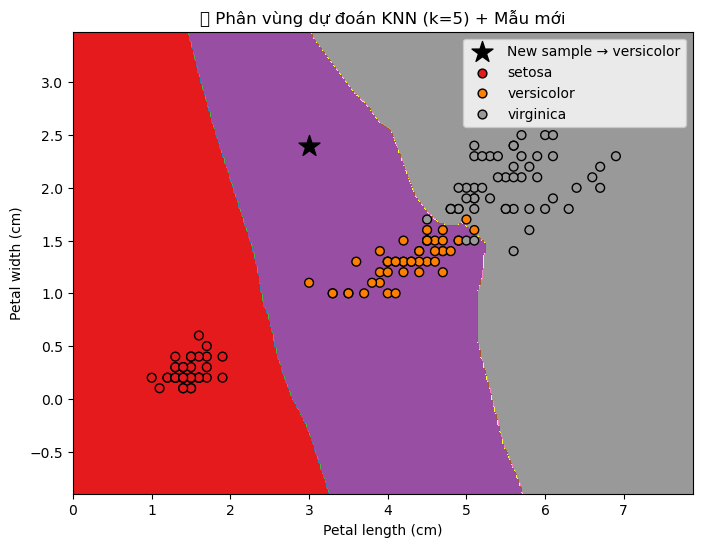

In [22]:
# --- 1️⃣ Import thư viện ---
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# --- 2️⃣ Tải dữ liệu ---
iris = load_iris()
X = iris.data[:, 2:4]   # chỉ lấy 2 đặc trưng: petal length & petal width
y = iris.target
Y_copy = y

# --- 3️⃣ Chia train/test ---
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# --- 4️⃣ Huấn luyện mô hình ---
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# --- 5️⃣ Mẫu mới cần dự đoán ---
sample = np.array([[3, 2.4]])
pred_class = knn.predict(sample)[0]
pred_name = iris.target_names[pred_class]
print(f"🌺 Mẫu {sample} được dự đoán là: {pred_name}")

# --- 6️⃣ Vẽ vùng phân loại ---
h = 0.02  # độ phân giải lưới
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# --- 7️⃣ Hiển thị ---
# --- 7️⃣ Hiển thị ---
plt.figure(figsize=(8,6))
norm = plt.Normalize(vmin=y.min(), vmax=y.max())  # Normalize cmap từ 0 đến 2
plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=1.0, norm=norm)  # Đặt alpha=1.0 để màu rắn
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40, norm=norm)
plt.scatter(sample[0, 0], sample[0, 1], c='black', marker='*', s=250, label=f"New sample → {pred_name}")
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title("🌸 Phân vùng dự đoán KNN (k=5) + Mẫu mới")

# Thêm legend cho các nhãn (màu sắc của điểm dữ liệu)
for label in np.unique(y):
    plt.scatter([], [], c=plt.cm.Set1(norm(label)), label=iris.target_names[label], edgecolor='k', s=40)

plt.legend()
plt.show()